# **Decision Tree Algorithm - Based around a Diabetic Datset**

**Importing Libraries/Dependencies**

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Code beings here...... Loading the Data

In [47]:
df = pd.read_csv("diabetes.csv")

Fetching the Head of the Dataset, looking to read/analyze the columns, getting a feel for the dataset

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Featuring Selection**

Creating the training and Test set, to review & understand the model's performance.

Splitting the DataFrame into 2 variables.

In [51]:
X = df.iloc[:,:8]
y=df['Outcome']

In [52]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [53]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# **Splitting Data**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


# **Training/Testing/Building the Tree Decision Model**

In [56]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# **Evaluating Model:**

Looking to calculate the model's performance by percentage.

In [71]:
# Showing our Model accuracy
accuracy_score= metrics.accuracy_score(y_test, y_pred)
print('The accuracy score is', str('{:04.2f}'. format(accuracy_score*100))+'%')

The accuracy score is 71.43%


Our accuracy is around 71%, which is good,

However, fine-tuning the parameters of this model could improve the accuracy even more.

In [58]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# **Visualizing The Decision Tree**

Importing Dependencies/Libraries

Utilizing graphviz and sklearn.tree Libraries/Depdencies to create the initial decision tree.

Exporting it into DOT format, and creating the png that visualizing the Decision Tree.

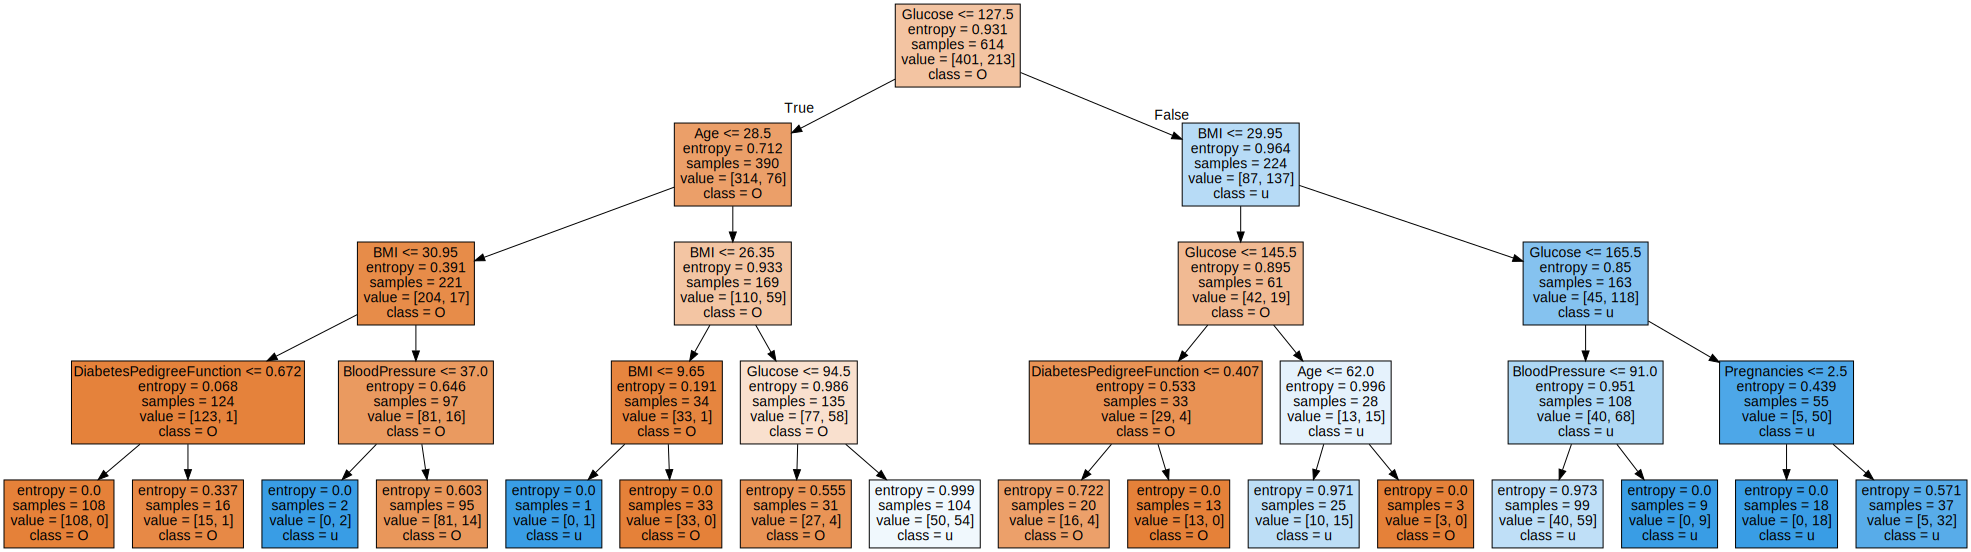

In [72]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],

                                                                                        class_names='Outcome',
                                                                                        filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

# **Optimizing the Decision Tree Performance**

Creating the Decision Tree Classifier called clf, using it to classify whether a person has diabetes or not based on the 8 features provided in the dataset.

In [75]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('The accuracy score is' , str('{:04.2f}'.format(accuracy_score* 100))+'%')

The accuracy score is 71.43%


# **Visualizing New Decision Trees**

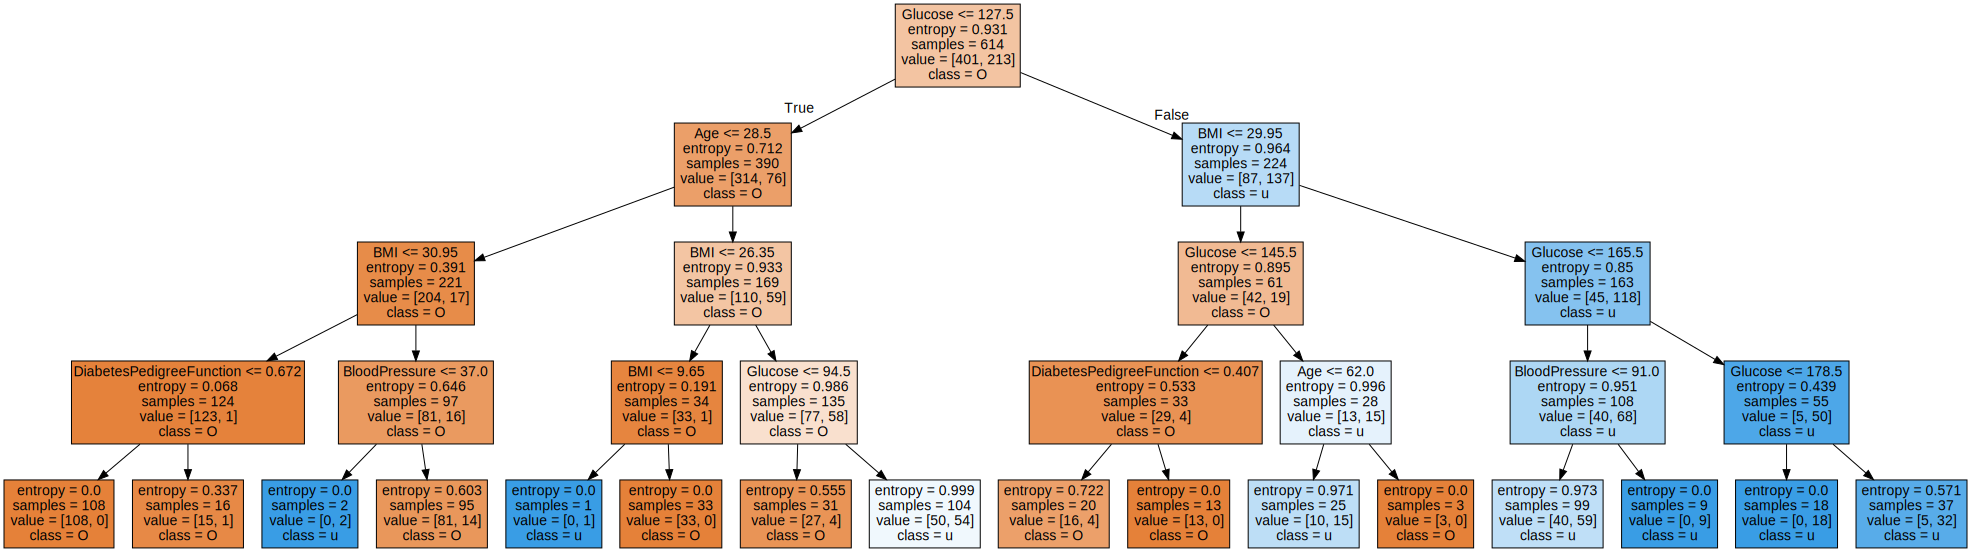

In [74]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],

                                                                                        class_names='Outcome',
                                                                                        filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

# **That's it! Hope you enjoyed.**